# EDA

## Importing the libraries

In [30]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns;

In [31]:
! pip install vaderSentiment

## Dataframes

In [32]:
airline_scrapped_review_clean_df = pd.read_csv('/kaggle/input/airline-scrapped-review-cleaned/AirlineScrappedReview_Cleaned.csv')

In [33]:
airline_scrapped_review_clean_df.columns = airline_scrapped_review_clean_df.columns.str.lower()

In [34]:
airline_scrapped_review_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3575 entries, 0 to 3574
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passanger_name   3574 non-null   object 
 1   flying_date      955 non-null    object 
 2   route            2809 non-null   object 
 3   rating           3575 non-null   int64  
 4   verified         3575 non-null   object 
 5   review_title     3575 non-null   object 
 6   review_content   3575 non-null   object 
 7   traveller_type   3575 non-null   object 
 8   class            3575 non-null   object 
 9   start_location   2809 non-null   object 
 10  end_location     2809 non-null   object 
 11  layover_route    484 non-null    object 
 12  start_latitude   3515 non-null   float64
 13  start_longitude  3515 non-null   float64
 14  start_address    3515 non-null   object 
 15  end_latitude     3476 non-null   float64
 16  end_longitude    3476 non-null   float64
 17  end_address   

In [35]:
airline_scrapped_review_clean_df.describe()

,rating,start_latitude,start_longitude,end_latitude,end_longitude
count,3575.000000,3515.000000,3515.000000,3476.000000,3476.000000
mean,4.790490,42.639473,-2.164986,40.550399,-1.118816
std,3.170323,17.022014,44.576587,18.723619,46.045735
min,1.000000,-37.666951,-123.182909,-37.814245,-123.179234
25%,2.000000,41.893320,-0.458780,39.739236,-0.458780
50%,4.000000,46.314475,-0.127765,46.314475,-0.127765
75%,8.000000,51.467739,11.048029,51.467739,11.048029
max,10.000000,65.011873,151.208285,64.145981,174.550610


In [36]:
airline_scrapped_review_clean_df.sample(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,passanger_name,flying_date,route,rating,verified,review_title,review_content,traveller_type,class,start_location,end_location,layover_route,start_latitude,start_longitude,start_address,end_latitude,end_longitude,end_address
363,L Deane,July 2021,Singapore to London,1,Trip Verified,"whole experience was stressful, costly",I had a future travel voucher for Singapore to...,Solo Leisure,Economy Class,Singapore,London,NaN,1.357107,103.819499,Singapore,51.507446,-0.127765,"London, Greater London, England, United Kingdom"
1466,B Saunders,NaN,Beijing to London Heathrow,2,Not Verified,now providing a very inferior product,Verified Review \r\nFlew British Airways fro...,Business,Business Class,Beijing,London Heathrow,NaN,39.905714,116.391297,"北京市, 东城区, 北京市, 100010, 中国",51.467739,-0.458780,"London Heathrow Airport, Northern Perimeter Ro..."
1779,Lynda Wenham-Jones,January 2017,LGW to BGI,2,Not Verified,make sure you pack a sandwich,Verified Review London Gatwick to Barbados r...,Couple Leisure,Economy Class,London Gatwick,Bridgetown - Grantley Adams International,NaN,51.154108,-0.182312,"London Gatwick Airport, Perimeter Road East, L...",NaN,NaN,NaN
524,David Ellis,NaN,Johannesburg to Cape Town,7,Not Verified,need to move with the times,British Airways (Comair) Johannesburg to Cape ...,Couple Leisure,Business Class,Johannesburg,Cape Town,NaN,-26.205000,28.049722,"Johannesburg, City of Johannesburg Metropolita...",-33.928992,18.417396,"Cape Town, City of Cape Town, Western Cape, 80..."
2153,Clive Drake,NaN,LHR to BCN,2,Not Verified,erosion of quality and services,There are many negative reviews on this site -...,Couple Leisure,Business Class,London Heathrow,Barcelona,NaN,51.467739,-0.458780,"London Heathrow Airport, The Beacon Roundabout...",41.382894,2.177432,"Barcelona, Barcelonès, Barcelona, Catalunya, 0..."


In [37]:
print(airline_scrapped_review_clean_df.shape)
print(airline_scrapped_review_clean_df.columns)
print(airline_scrapped_review_clean_df.head())

(3575, 18)
Index(['passanger_name', 'flying_date', 'route', 'rating', 'verified',
       'review_title', 'review_content', 'traveller_type', 'class',
       'start_location', 'end_location', 'layover_route', 'start_latitude',
       'start_longitude', 'start_address', 'end_latitude', 'end_longitude',
       'end_address'],
      dtype='object')
  passanger_name flying_date                  route  rating       verified  \
0     Paige Boet   June 2023  New Orleans to London       1  Trip Verified   
1        S Layne  March 2023        London to Amman       1  Trip Verified   
2    E Lanewoski         NaN     Heathrow to Bodrum       2  Trip Verified   
3    Joel Burman   June 2023        Amman to London       4   Not Verified   
4        R Vines         NaN   London City to Ibiza       7  Trip Verified   

                             review_title  \
0             The airline lost my luggage   
1  fully refunded by our travel insurance   
2             no boarding drinks provided   
3   

Passanger_Name        1
Flying_Date        2620
Route               766
Rating                0
Verified              0
Review_title          0
Review_content        0
Traveller_Type        0
Class                 0
Start_Location      766
End_Location        766
Layover_Route      3091
Start_Latitude       60
Start_Longitude      60
Start_Address        60
End_Latitude         99
End_Longitude        99
End_Address          99
dtype: int64


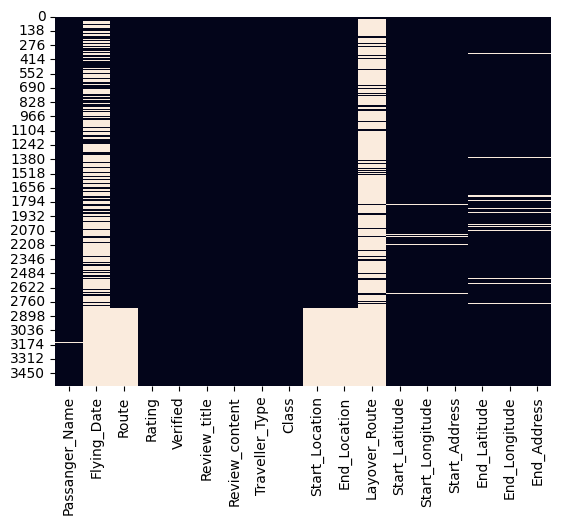

In [13]:
print(airline_scrapped_review_clean_df.isnull().sum())
sns.heatmap(airline_scrapped_review_clean_df.isnull(), cbar=False); plt.show()


In [14]:
print(airline_scrapped_review_clean_df.info())
print(airline_scrapped_review_clean_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3575 entries, 0 to 3574
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Passanger_Name   3574 non-null   object 
 1   Flying_Date      955 non-null    object 
 2   Route            2809 non-null   object 
 3   Rating           3575 non-null   int64  
 4   Verified         3575 non-null   object 
 5   Review_title     3575 non-null   object 
 6   Review_content   3575 non-null   object 
 7   Traveller_Type   3575 non-null   object 
 8   Class            3575 non-null   object 
 9   Start_Location   2809 non-null   object 
 10  End_Location     2809 non-null   object 
 11  Layover_Route    484 non-null    object 
 12  Start_Latitude   3515 non-null   float64
 13  Start_Longitude  3515 non-null   float64
 14  Start_Address    3515 non-null   object 
 15  End_Latitude     3476 non-null   float64
 16  End_Longitude    3476 non-null   float64
 17  End_Address   

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [15]:
for col in ['verified', 'traveller_Type', 'class']:
    print(f"{col}: {airline_scrapped_review_clean_df[col].unique()} | Counts: {airline_scrapped_review_clean_df[col].value_counts()}")


Verified: ['Trip Verified' 'Not Verified'] | Counts: Verified
Not Verified     2508
Trip Verified    1067
Name: count, dtype: int64
Traveller_Type: ['Solo Leisure' 'Couple Leisure' 'Family Leisure' 'Business' 'Unknown'
 'Various'] | Counts: Traveller_Type
Couple Leisure    949
Solo Leisure      860
Unknown           760
Business          623
Family Leisure    382
Various             1
Name: count, dtype: int64
Class: ['Economy Class' 'Business Class' 'Premium Economy' 'First Class'
 'Unknown'] | Counts: Class
Economy Class      1846
Business Class     1160
Premium Economy     358
First Class         209
Unknown               2
Name: count, dtype: int64


count    3575.000000
mean        4.790490
std         3.170323
min         1.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        10.000000
Name: Rating, dtype: float64


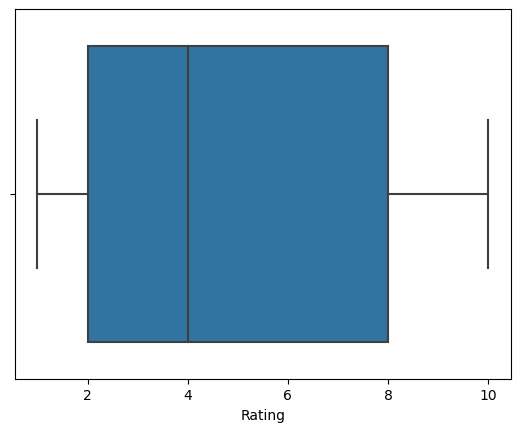

In [16]:
print(airline_scrapped_review_clean_df['rating'].describe())
sns.boxplot(x=airline_scrapped_review_clean_df['rating']); plt.show()


In [17]:
print(airline_scrapped_review_clean_df.duplicated().sum())
print(airline_scrapped_review_clean_df['passanger_Name'].isnull().sum())


74
1


In [19]:
numeric_df = airline_scrapped_review_clean_df.select_dtypes(include=['float64', 'int64'])
print(numeric_df.corr())


                   Rating  Start_Latitude  Start_Longitude  End_Latitude  \
Rating           1.000000        0.053158         0.038163     -0.009968   
Start_Latitude   0.053158        1.000000        -0.201806     -0.127849   
Start_Longitude  0.038163       -0.201806         1.000000     -0.050639   
End_Latitude    -0.009968       -0.127849        -0.050639      1.000000   
End_Longitude    0.010533       -0.049311        -0.001746     -0.215104   

                 End_Longitude  
Rating                0.010533  
Start_Latitude       -0.049311  
Start_Longitude      -0.001746  
End_Latitude         -0.215104  
End_Longitude         1.000000  


In [38]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

combined_text = airline_scrapped_review_clean_df['review_title'] + ' ' + airline_scrapped_review_clean_df['review_content']

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    if isinstance(text, str):
        return analyzer.polarity_scores(text)['compound']
    else:
        return None

airline_scrapped_review_clean_df['sentiment_score'] = airline_scrapped_review_clean_df['review_content'].apply(get_sentiment)

print(airline_scrapped_review_clean_df[['review_content', 'sentiment_score']].head())

                                      review_content  sentiment_score
0  The airline lost my luggage and was absolutely...          -0.7990
1  We booked on the BA website, round trip flight...           0.0219
2  First time flying with BA business class, neve...          -0.7096
3  You can buy sandwiches and crisps but don't ex...          -0.5849
4  This is a two-for-one review covering economy ...           0.9789
